In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error,  mean_absolute_percentage_error, mean_squared_error, r2_score

In [3]:
batteryData = pd.read_csv(r'C:\Users\janhv\Downloads\Train_data.csv')

In [4]:
batteryData.head()

,Voltage,Current,Temperature,Capacity,SOC Capacity,SOC Percentage
0,4.18616,-0.03831,-0.73611,0.00000,2.59028,0.999495
1,4.18380,-0.07662,-0.73611,0.00000,2.59028,0.999495
2,4.18228,-0.08939,-0.73611,-0.00001,2.59027,0.999491
3,4.18110,-0.09450,-0.73611,-0.00001,2.59027,0.999491
4,4.18026,-0.09450,-0.73611,-0.00001,2.59027,0.999491


In [5]:
batteryData = batteryData.round({'Voltage':4,'Current':4, 'Temperature':4, 'Capacity':4, 'SOC Capacity':4, 'SOC Percentage':4}) 

In [6]:
print(batteryData)

         Voltage  Current  Temperature  Capacity  SOC Capacity  SOC Percentage
0         4.1862  -0.0383      -0.7361    0.0000        2.5903          0.9995
1         4.1838  -0.0766      -0.7361    0.0000        2.5903          0.9995
2         4.1823  -0.0894      -0.7361   -0.0000        2.5903          0.9995
3         4.1811  -0.0945      -0.7361   -0.0000        2.5903          0.9995
4         4.1803  -0.0945      -0.7361   -0.0000        2.5903          0.9995
...          ...      ...          ...       ...           ...             ...
1048570   3.8399  -0.1022      23.9762   -1.0494        1.5408          0.5946
1048571   3.8398  -0.1022      23.9762   -1.0494        1.5408          0.5946
1048572   3.8398  -0.1022      23.9762   -1.0494        1.5408          0.5946
1048573   3.8398  -0.1022      23.9762   -1.0494        1.5408          0.5946
1048574   3.8398  -0.1022      23.9762   -1.0494        1.5408          0.5946

[1048575 rows x 6 columns]


In [7]:
batteryData.shape

(1048575, 6)

In [8]:
batteryData.columns

Index(['Voltage', 'Current', 'Temperature', 'Capacity', 'SOC Capacity',
       'SOC Percentage'],
      dtype='object')

In [9]:
# Check columns info
batteryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Voltage         1048575 non-null  float64
 1   Current         1048575 non-null  float64
 2   Temperature     1048575 non-null  float64
 3   Capacity        1048575 non-null  float64
 4   SOC Capacity    1048575 non-null  float64
 5   SOC Percentage  1048575 non-null  float64
dtypes: float64(6)
memory usage: 48.0 MB


In [10]:
# Check match df stats
batteryData.describe()

,Voltage,Current,Temperature,Capacity,SOC Capacity,SOC Percentage
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.691048e+00,-1.189684e+00,8.674588e+00,-1.194775e+00,1.395504e+00,5.384745e-01
std,2.801109e-01,2.448044e+00,8.513065e+00,7.541127e-01,7.541138e-01,2.909844e-01
min,2.792700e+00,-1.809830e+01,-8.413000e-01,-2.590300e+00,0.000000e+00,0.000000e+00
25%,3.487400e+00,-2.334400e+00,3.155000e-01,-1.785700e+00,8.046000e-01,3.105000e-01
50%,3.692300e+00,-6.181000e-01,9.359100e+00,-1.235500e+00,1.354800e+00,5.228000e-01
75%,3.923500e+00,0.000000e+00,1.020040e+01,-4.940000e-01,2.096300e+00,8.089000e-01
max,4.239900e+00,6.004700e+00,2.618450e+01,1.300000e-03,2.591600e+00,1.000000e+00


In [11]:
batteryData['Voltage'].max()

4.2399

In [12]:
batteryData['Current'].max()

6.0047

In [13]:
batteryData['Temperature'].max()

26.1845

In [14]:
batteryData['Capacity'].max()

0.0013

In [15]:
# Check null entries
batteryData.isna().sum()

Voltage           0
Current           0
Temperature       0
Capacity          0
SOC Capacity      0
SOC Percentage    0
dtype: int64

In [16]:
# Check duplicate entries
batteryData.duplicated().sum()

199228

In [17]:
# Drop duplicate rows
batteryData = batteryData.drop_duplicates()

In [18]:
# Check duplicate entries
batteryData.duplicated().sum()

0

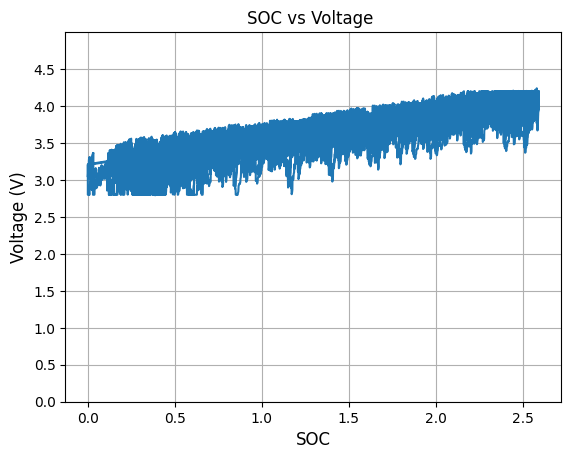

In [19]:
plt.plot(batteryData['SOC Capacity'], batteryData['Voltage'], linestyle='-',label='Voltage')

# # Set axis limits and ticks
# plt.xlim(0, 10000)
# plt.xticks(np.arange(0, 7500, 500), np.arange(0, 7500, 500))  # x-axis limits and ticks with rotation
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5, 0.5))

# Add labels to axes
plt.xlabel('X - SOC Capacity', fontsize=12)  # Label for x-axis
plt.ylabel('Y - Voltage', fontsize=12)  # Label for y-axis

# Add labels and title
plt.xlabel('SOC')
plt.ylabel('Voltage (V)')
plt.title('SOC vs Voltage ')

plt.grid(True)  # Add grid

# # Plot Time vs Current on the same graph
# plt.twinx()  # Create a twin y-axis sharing the same x-axis
# plt.plot(batteryData['SOC Percentage'], batteryData['Current'], label='Current(mA)', color='orange')
# plt.ylabel('Current')
# plt.legend(loc='upper right')

plt.show()

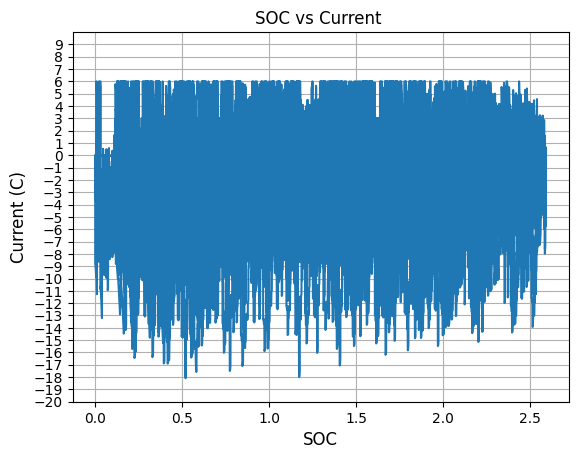

In [20]:
plt.plot(batteryData['SOC Capacity'], batteryData['Current'], linestyle='-',label='Current')

# # Set axis limits and ticks
# plt.xlim(0, 10000)
# plt.xticks(np.arange(0, 7500, 500), np.arange(0, 7500, 500))  # x-axis limits and ticks with rotation
plt.ylim(-20, 10)
plt.yticks(np.arange(-20, 10,1))

# Add labels to axes
plt.xlabel('X - SOC Capacity', fontsize=12)  # Label for x-axis
plt.ylabel('Y - Current', fontsize=12)  # Label for y-axis

# Add labels and title
plt.xlabel('SOC')
plt.ylabel('Current (C)')
plt.title('SOC vs Current ')

plt.grid(True)  # Add grid

# # Plot Time vs Current on the same graph
# plt.twinx()  # Create a twin y-axis sharing the same x-axis
# plt.plot(batteryData['SOC Percentage'], batteryData['Current'], label='Current(mA)', color='orange')
# plt.ylabel('Current')
# plt.legend(loc='upper right')

plt.show()

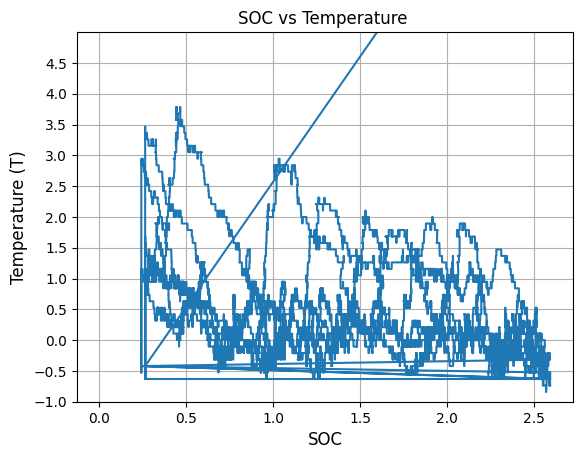

In [21]:
plt.plot(batteryData['SOC Capacity'], batteryData['Temperature'], linestyle='-',label='Temperature')

# # Set axis limits and ticks
# plt.xlim(0, 10000)
# plt.xticks(np.arange(0, 7500, 500), np.arange(0, 7500, 500))  # x-axis limits and ticks with rotation
plt.ylim(-1, 5)
plt.yticks(np.arange(-1, 5, 0.5))

# Add labels to axes
plt.xlabel('X - SOC Capacity', fontsize=12)  # Label for x-axis
plt.ylabel('Y - Temperature', fontsize=12)  # Label for y-axis

# Add labels and title
plt.xlabel('SOC')
plt.ylabel('Temperature (T)')
plt.title('SOC vs Temperature ')

plt.grid(True)  # Add grid

# # Plot Time vs Current on the same graph
# plt.twinx()  # Create a twin y-axis sharing the same x-axis
# plt.plot(batteryData['SOC Percentage'], batteryData['Current'], label='Current(mA)', color='orange')
# plt.ylabel('Current')
# plt.legend(loc='upper right')

plt.show()

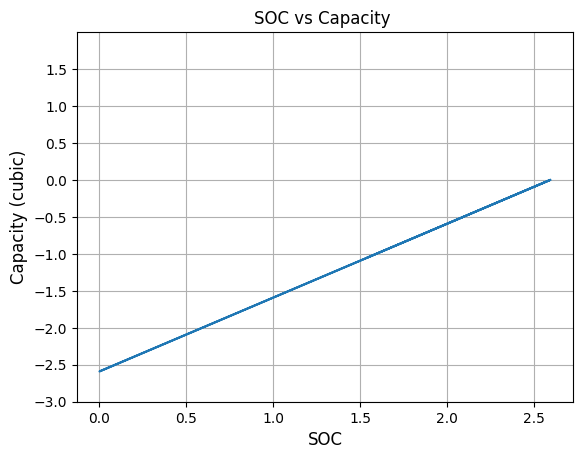

In [22]:
plt.plot(batteryData['SOC Capacity'], batteryData['Capacity'], linestyle='-',label='Capacity')

# # Set axis limits and ticks
# plt.xlim(0, 10000)
# plt.xticks(np.arange(0, 7500, 500), np.arange(0, 7500, 500))  # x-axis limits and ticks with rotation
plt.ylim(-3, 2)
plt.yticks(np.arange(-3, 2, 0.5))  


# Add labels to axes
plt.xlabel('X - SOC Capacity', fontsize=12)  # Label for x-axis
plt.ylabel('Y - Capacity', fontsize=12)  # Label for y-axis

# Add labels and title
plt.xlabel('SOC')
plt.ylabel('Capacity (cubic)')
plt.title('SOC vs Capacity ')

plt.grid(True)  # Add grid

# # Plot Time vs Current on the same graph
# plt.twinx()  # Create a twin y-axis sharing the same x-axis
# plt.plot(batteryData['SOC Percentage'], batteryData['Current'], label='Current(mA)', color='orange')
# plt.ylabel('Current')
# plt.legend(loc='upper right')

plt.show()

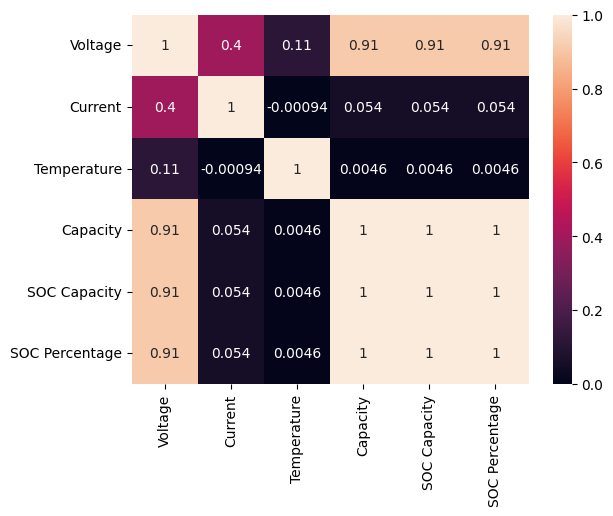

In [23]:
#plotting the heatmap for correlation
ax = sns.heatmap(batteryData.corr(),annot=True)

In [24]:
features = ['Voltage', 'Current', 'Temperature', 'Capacity']
targetVariable='SOC Percentage'

In [25]:
X = batteryData[features]
X

,Voltage,Current,Temperature,Capacity
0,4.1862,-0.0383,-0.7361,0.0000
1,4.1838,-0.0766,-0.7361,0.0000
2,4.1823,-0.0894,-0.7361,-0.0000
3,4.1811,-0.0945,-0.7361,-0.0000
4,4.1803,-0.0945,-0.7361,-0.0000
...,...,...,...,...
1048552,3.8401,-0.1047,23.9762,-1.0494
1048555,3.8399,-0.1022,23.9762,-1.0494
1048556,3.8399,-0.1047,23.9762,-1.0494
1048570,3.8399,-0.1022,23.9762,-1.0494


In [26]:
y = batteryData[targetVariable].values
y = y.astype('float')
y

array([0.9995, 0.9995, 0.9995, ..., 0.5946, 0.5946, 0.5946])

In [27]:
from sklearn.preprocessing import StandardScaler

predictorScaler = StandardScaler()

predictorScalerFit = predictorScaler.fit(X)

X_enc = predictorScalerFit.transform(X)
X_enc

array([[ 1.75211511,  0.52632187, -1.10642325,  1.57478272],
       [ 1.74333966,  0.51188877, -1.10642325,  1.57478272],
       [ 1.73785501,  0.50706518, -1.10642325,  1.57478272],
       ...,
       [ 0.48589078,  0.50129948,  1.79564074,  0.08959033],
       [ 0.48589078,  0.50224158,  1.79564074,  0.08959033],
       [ 0.48552514,  0.50224158,  1.79564074,  0.08959033]])

In [28]:
# Splitting the data into trainand test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)
print('X_train.shape - ',X_train.shape)
print('X_test.shape - ',X_test.shape)
print('y_train.shape - ',y_train.shape)
print('y_test.shape - ',y_test.shape)

X_train.shape -  (679477, 4)
X_test.shape -  (169870, 4)
y_train.shape -  (679477,)
y_test.shape -  (169870,)


In [29]:
y_test.max()

1.0

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
import xgboost as xg 

In [31]:
regressor = [
    LinearRegression(),
    DecisionTreeRegressor(),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    xg.XGBRegressor() 
]

name = []
train_acc = []
test_acc = []
models = []
rmse = []


i = 0
for regression in regressor:
    regression.fit(X_train, y_train)
    name.append(type(regression).__name__)
    train_acc.append(regression.score(X_train, y_train))
    test_acc.append(regression.score(X_test, y_test))
    models.append(regression)
    rmse.append(np.sqrt(mean_squared_error(regression.predict(X_test), y_test)))

In [32]:
df_score = pd.DataFrame(list(zip(name, train_acc, test_acc, rmse, models)), columns=['name', 'train_acc', 'test_acc', 'rmse', 'models'])
df_score.set_index('name', inplace=True)
df_score.sort_values(by=['test_acc'], inplace=True)
df_score

,train_acc,test_acc,rmse,models
name,,,,
AdaBoostRegressor,0.993160,0.993174,0.022525,"(DecisionTreeRegressor(max_depth=3, random_sta..."
XGBRegressor,0.999985,0.999985,0.001055,"XGBRegressor(base_score=None, booster=None, ca..."
DecisionTreeRegressor,1.000000,1.000000,0.000036,DecisionTreeRegressor()
LinearRegression,1.000000,1.000000,0.000031,LinearRegression()
RandomForestRegressor,1.000000,1.000000,0.000030,"(DecisionTreeRegressor(max_features=1.0, rando..."


In [33]:
X_test

array([[-1.39022733, -0.99921483,  0.16553952, -1.30091999],
       [-0.10572081, -0.02326628,  0.11614679, -0.25757729],
       [ 0.54585636, -1.17150755,  0.07909636,  1.04249678],
       ...,
       [ 1.74078016,  1.02586523,  1.79564074,  1.52722939],
       [-0.55875343, -0.99442892, -1.01998009, -0.02858536],
       [ 1.58867235,  0.77368175,  0.06675405,  1.51703939]])

In [34]:
#Final model
model = df_score.loc["RandomForestRegressor", "models"]
prediction = model.predict(X_test)
prediction

array([0.215438, 0.4999  , 0.8544  , ..., 0.9865  , 0.562381, 0.983795])

C:\Users\janhv\AppData\Local\Temp\ipykernel_19960\4148963261.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


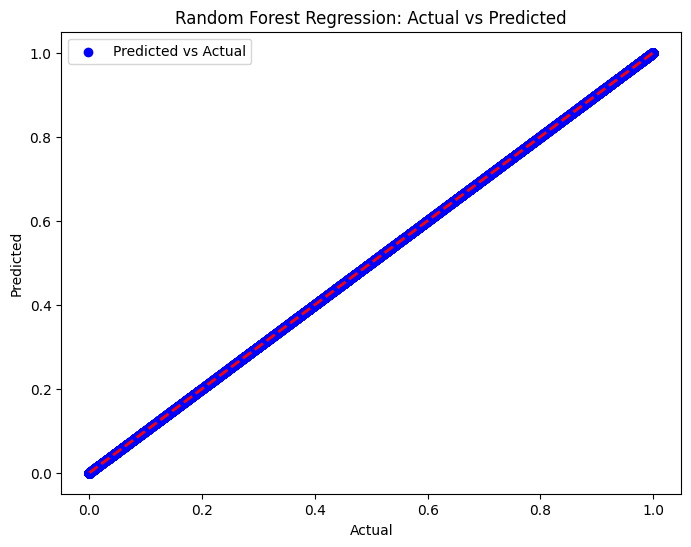

In [35]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [36]:
prediction.max()

1.0

In [37]:
predictorScalerFit.inverse_transform(X_test)

array([[ 3.3268, -4.0865, 10.0952, -2.0319],
       [ 3.6781, -1.4967,  9.6746, -1.2947],
       [ 3.8563, -4.5437,  9.3591, -0.3761],
       ...,
       [ 4.1831,  1.2873, 23.9762, -0.0336],
       [ 3.5542, -4.0738,  0.    , -1.1329],
       [ 4.1415,  0.6181,  9.254 , -0.0408]])

In [38]:
import pickle
pickle.dump(model,open('BatteryHealthPredictorModel.pkl','wb'))

In [39]:
 
mae = mean_absolute_error(y_test, prediction)
mape = mean_absolute_percentage_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
N = len(y_test)
k = 4 #no. of independent variable.
adjusted_r2 = (1- r2 )*(N-1)/(N-k-1)
rmse = mean_squared_error(y_test, prediction)


In [40]:
names = ['Mean Absolute Error(MAE)' , 'Mean Percentage Error(MAPE)' ,'R-Squared' , 'Adjusted R-Squared' , 'Root Mean Squared Error']
evaluation_metrics = [ mae, mape, r2, adjusted_r2, rmse]

In [41]:
print(evaluation_metrics)

[1.335337722332533e-05, 5.089100400509504e-05, 0.9999999878511449, 1.2149141226710187e-08, 9.029313175749421e-10]


In [42]:
evaluation_score = pd.DataFrame(list(zip(names, evaluation_metrics)), columns=['names', 'evaluation_metrics'])
evaluation_score.set_index('names', inplace=True)
evaluation_score.sort_values(by=['names'], inplace=True)
evaluation_score

,evaluation_metrics
names,
Adjusted R-Squared,1.214914e-08
Mean Absolute Error(MAE),1.335338e-05
Mean Percentage Error(MAPE),5.089100e-05
R-Squared,1.000000e+00
Root Mean Squared Error,9.029313e-10


In [43]:
format(mae, '.10f')

'0.0000133534'

In [44]:
format(mape, '.10f')

'0.0000508910'

In [45]:
format(r2, '.10f')

'0.9999999879'

In [46]:
format(adjusted_r2, '.10f')

'0.0000000121'

In [47]:
format(rmse, '.10f')

'0.0000000009'

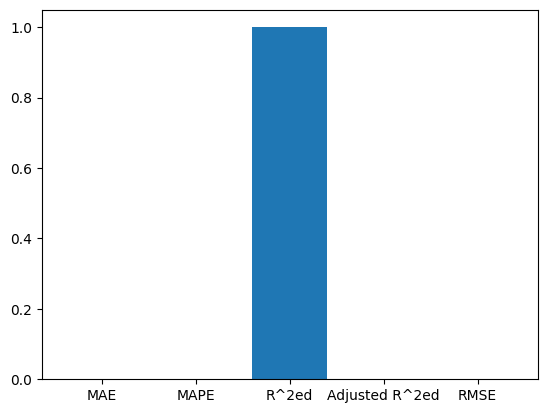

In [48]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array(['MAE' , 'MAPE' ,'R^2ed' , 'Adjusted R^2ed' , 'RMSE'])
y = np.array([mae, mape, r2, adjusted_r2, rmse])

plt.bar(x,y)
plt.show()

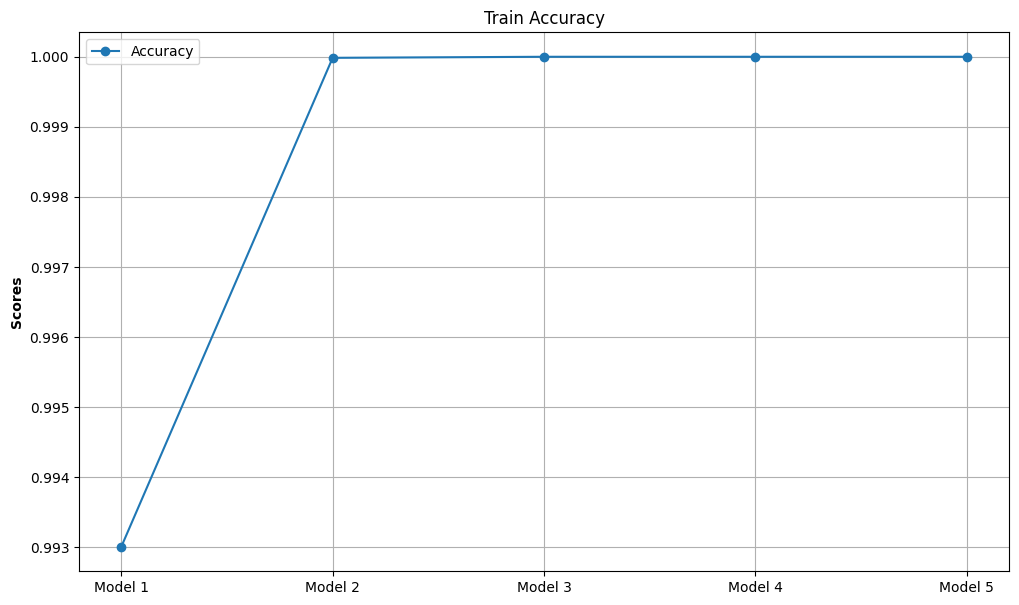

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Example values for each model
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracy = [0.993008, 0.999985, 1.000000, 1.000000, 1.000000]
# precision = [0.75, 0.78, 0.72, 0.80, 0.79]
# recall = [0.80, 0.85, 0.78, 0.82, 0.75]
# f1_score = [0.77, 0.80, 0.75, 0.78, 0.82]
# roc_auc = [0.90, 0.88, 0.92, 0.85, 0.91]

# Set the x-axis values
x = np.arange(len(models))

# Plotting the line plot for each metric
plt.figure(figsize=(12, 7))

plt.plot(x, accuracy, marker='o', label='Accuracy')
# plt.plot(x, precision, marker='s', label='Precision')
# plt.plot(x, recall, marker='^', label='Recall')
# plt.plot(x, f1_score, marker='d', label='F1 Score')
# plt.plot(x, roc_auc, marker='*', label='ROC AUC')

# Add xticks with model names
plt.xticks(x, models)

# Add y label
plt.ylabel('Scores', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.title('Train Accuracy')
plt.grid(True)
plt.show()

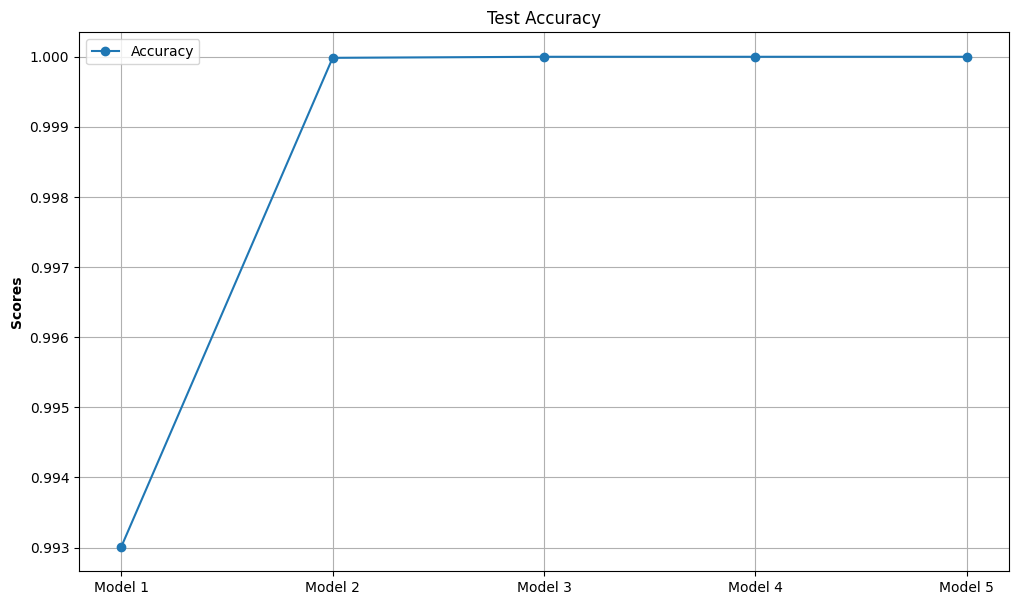

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Example values for each model
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracy = [0.993012, 0.999985, 1.000000, 1.000000, 1.000000]
# precision = [0.75, 0.78, 0.72, 0.80, 0.79]
# recall = [0.80, 0.85, 0.78, 0.82, 0.75]
# f1_score = [0.77, 0.80, 0.75, 0.78, 0.82]
# roc_auc = [0.90, 0.88, 0.92, 0.85, 0.91]

# Set the x-axis values
x = np.arange(len(models))

# Plotting the line plot for each metric
plt.figure(figsize=(12, 7))

plt.plot(x, accuracy, marker='o', label='Accuracy')
# plt.plot(x, precision, marker='s', label='Precision')
# plt.plot(x, recall, marker='^', label='Recall')
# plt.plot(x, f1_score, marker='d', label='F1 Score')
# plt.plot(x, roc_auc, marker='*', label='ROC AUC')

# Add xticks with model names
plt.xticks(x, models)

# Add y label
plt.ylabel('Scores', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.title('Test Accuracy')
plt.grid(True)
plt.show()

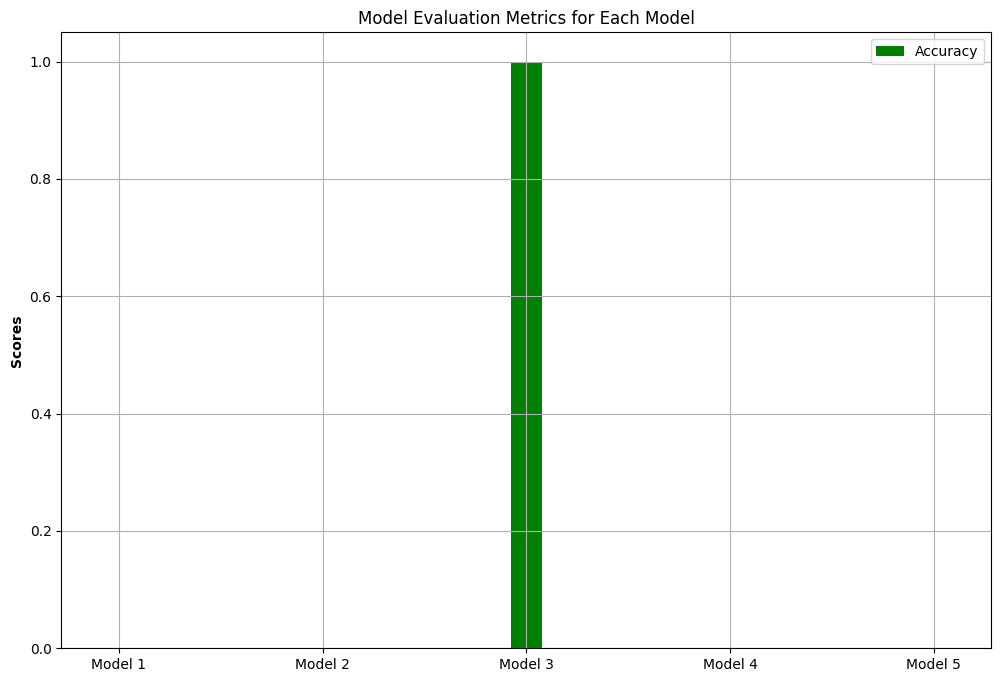

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Example values for each model
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracy = [0.0000133543, 0.0000517643, 0.9999999878, 0.0000000122, 0.0000000009]
# precision = [0.75, 0.78, 0.72, 0.80, 0.79]
# recall = [0.80, 0.85, 0.78, 0.82, 0.75]
# f1_score = [0.77, 0.80, 0.75, 0.78, 0.82]
# roc_auc = [0.90, 0.88, 0.92, 0.85, 0.91]

# Set the x-axis values
x = np.arange(len(models))

# Plotting the line plot for each metric
plt.figure(figsize=(12, 8))

plt.bar(x, accuracy, label='Accuracy',color='green', width=0.15)
# plt.plot(x, precision, marker='s', label='Precision')
# plt.plot(x, recall, marker='^', label='Recall')
# plt.plot(x, f1_score, marker='d', label='F1 Score')
# plt.plot(x, roc_auc, marker='*', label='ROC AUC')

# Add xticks with model names
plt.xticks(x, models)

# Add y label
plt.ylabel('Scores', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.title('Model Evaluation Metrics for Each Model')
plt.grid(True)
plt.show()